In [122]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as path_effects
import pandas as pd

# To add custom fonts.
import matplotlib.font_manager as fm

import math

In [123]:
#read data from fbref
def get_data (url, table_name):
    df = pd.read_html(url)[table_name]
    #team name last split of url
    team_name = url.split('/')[-1]
    df['Team'] = team_name
    #remove 'stats and the - before stats' from Team
    df['Team'] = df['Team'].str.replace('-Stats', '')
    df = df[['Round','Venue','Opponent','Result','GF', 'xG', 'GA', 'xGA', 'Team']]
    df['Round'] = df['Round'].str.extract('(\d+)')
    df = df.dropna()
    return df
    

In [124]:
#Function to get data
urls = ['https://fbref.com/en/squads/b8fd03ef/Manchester-City-Stats', 'https://fbref.com/en/squads/cff3d9bb/Chelsea-Stats', 'https://fbref.com/en/squads/822bd0ba/Liverpool-Stats']

#use for loop to get data from urls
dfs = []
for url in urls:
    dfs.append(get_data(url, 1))


In [125]:
#to a dataframe
df = pd.concat(dfs)


In [126]:
df

,Round,Venue,Opponent,Result,GF,xG,GA,xGA,Team
1,1,Away,Tottenham,L,0,1.9,1,1.3,Manchester-City
2,2,Home,Norwich City,W,5,2.7,0,0.1,Manchester-City
3,3,Home,Arsenal,W,5,3.8,0,0.1,Manchester-City
4,4,Away,Leicester City,W,1,2.9,0,0.8,Manchester-City
6,5,Home,Southampton,D,0,1.1,0,0.4,Manchester-City
...,...,...,...,...,...,...,...,...,...
55,35,Away,Newcastle Utd,W,1,2.3,0,0.2,Liverpool
57,36,Home,Tottenham,D,1,1.2,1,1.1,Liverpool
58,33,Away,Aston Villa,W,2,1.9,1,1.1,Liverpool
60,37,Away,Southampton,W,2,1.5,1,0.1,Liverpool


In [127]:
#get all the xG values and xGA values and put them in a list
xG_all = df['xG'].tolist()
xGA_all = df['xGA'].tolist()

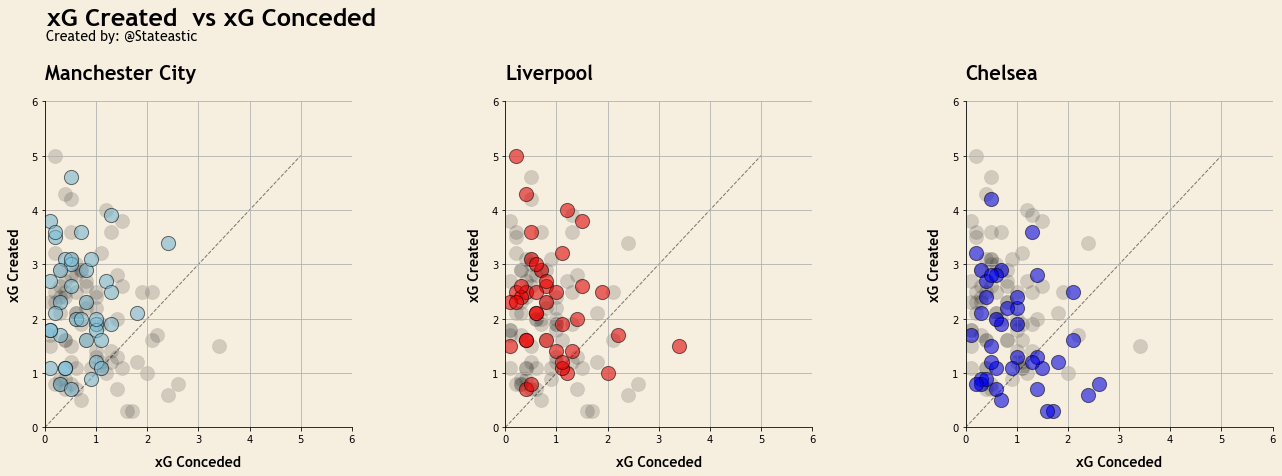

In [174]:
#create a scatter plot for xG vs xGA for each team with Venue[Home] in red and Venue[Away] in blue
fig = plt.figure(figsize=(22,6))

facecolor = '#f6eedf'

fig.patch.set_facecolor(facecolor)


#columns to be equally distributed
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.5)

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

#remove spines from all subplots
for ax in [ax1, ax2, ax3]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

#set facecolor of all subplots
for ax in [ax1, ax2, ax3]:
    ax.patch.set_facecolor(facecolor)

#set grid on all subplots
for ax in [ax1, ax2, ax3]:
    ax.grid(True)

#set xlim and ylim for all subplots
for ax in [ax1, ax2, ax3]:
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)

#set xlabel and ylabel for all subplots
for ax in [ax1, ax2, ax3]:
    ax.set_xlabel('xG Conceded', fontsize=14, fontweight='bold', fontname='Trebuchet MS', labelpad=10)
    ax.set_ylabel('xG Created', fontsize=14, fontweight='bold', fontname='Trebuchet MS', labelpad=10)

#dashed line for all subplots
for ax in [ax1, ax2, ax3]:
    ax.plot([0, max(xG_all)], [0, max(xG_all)], color='black', linestyle='--', linewidth=1, alpha=0.5, zorder = 1)


#Team 1

ax1.scatter(df[df['Team'] == 'Manchester-City']['xGA'], df[df['Team'] == 'Manchester-City']['xG'], color='skyblue', alpha=0.5, s=200, edgecolor = 'black', zorder = 2)
ax1.scatter(xGA_all, xG_all, color='black', alpha=0.15, s=200, edgecolor = 'grey', zorder = 1)
ax1.set_title('Manchester City', fontsize=20, fontweight='bold', fontname='Trebuchet MS', loc='left', y = 1.05)

#Team 2
ax2.scatter(df[df['Team'] == 'Liverpool']['xGA'], df[df['Team'] == 'Liverpool']['xG'], color='red', alpha=0.5, s=200, edgecolor = 'black', zorder = 2)
ax2.scatter(xGA_all, xG_all, color='black', alpha=0.15, s=200, edgecolor = 'grey', zorder = 1)
ax2.set_title('Liverpool', fontsize=20, fontweight='bold', fontname='Trebuchet MS', loc='left', y = 1.05)

#Team 3
ax3.scatter(df[df['Team'] == 'Chelsea']['xGA'], df[df['Team'] == 'Chelsea']['xG'], color='blue', alpha=0.5, s=200, edgecolor = 'black', zorder = 2)
ax3.scatter(xGA_all, xG_all, color='black', alpha=0.15, s=200, edgecolor = 'grey', zorder = 1)
ax3.set_title('Chelsea', fontsize=20, fontweight='bold', fontname='Trebuchet MS', loc='left', y = 1.05)


#plot title
plt.suptitle('xG Created  vs xG Conceded', fontsize=25, fontweight='bold', fontname='Trebuchet MS', y = 1.1, x = 0.23)

#subplot title
plt.text(0.25, 1.2, 'Created by: @Stateastic', fontsize=14, fontname='Trebuchet MS', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)

#save figure
fig.savefig('scatterplots.png', dpi=600, bbox_inches='tight', facecolor=facecolor)
